# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



In [2]:
# Output File (CSV)
city_weather_data_file = "data/cities_weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding selected lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#assign url variables

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"       

#create query url

query_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=rongcheng&units=imperial


In [42]:
#create list for dataframe
response = []
name=[]
latitude =[]
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
               
#set up counter for log
city_id = 0
series = 1

#Loop for responses
for city in cities:
    
    query_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"
    
    #Count city and set series limits
    if city_id <= 49:
        city_id += 1 
        
        #print log
        print(f"Processing record for City {city_id} of Series {series} : {city}")
        
        #request data from Open Weather
        
       
        #Try/except to request data
        try:
            city_data_response = requests.get(query_url).json()
            response.append(city_data_response)
            
            
            latitude.append(city_data_response['coord']['lat'])
            longitude.append(city_data_response['coord']['lon'])
            temperature.append(city_data_response['main']['temp_max'])
            humidity.append(city_data_response['main']['humidity'])
            cloudiness.append(city_data_response['clouds']['all'])
            wind_speed.append(city_data_response['wind']['speed'])
            country.append(city_data_response['sys']['country'])
            name.append(city_data_response['name'])
            date.append(city_data_response['dt'])
        
        except:
    
            print("City not found. Next...")
        
   #Reset series and city_id after 50 cities     
    else:
        series += 1
        city_id = 0
    

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=esperance&units=imperial
Processing record for City 1 of Series 1 : sao felix do xingu
Processing record for City 2 of Series 1 : airai
Processing record for City 3 of Series 1 : tiznit
Processing record for City 4 of Series 1 : cape town
Processing record for City 5 of Series 1 : hithadhoo
Processing record for City 6 of Series 1 : talnakh
Processing record for City 7 of Series 1 : lavrentiya
Processing record for City 8 of Series 1 : mount isa
Processing record for City 9 of Series 1 : bongouanou
Processing record for City 10 of Series 1 : taolanaro
City not found. Next...
Processing record for City 11 of Series 1 : mataura
Processing record for City 12 of Series 1 : broome
Processing record for City 13 of Series 1 : ushuaia
Processing record for City 14 of Series 1 : mahajanga
Processing record for City 15 of Series 1 : bredasdorp
Processing record for City 16 of Series 1 : port alfred
Processin

Processing record for City 48 of Series 3 : miles city
Processing record for City 49 of Series 3 : comodoro rivadavia
Processing record for City 50 of Series 3 : rodrigues alves
Processing record for City 1 of Series 4 : sept-iles
Processing record for City 2 of Series 4 : lalin
Processing record for City 3 of Series 4 : ponta do sol
Processing record for City 4 of Series 4 : aklavik
Processing record for City 5 of Series 4 : ouesso
Processing record for City 6 of Series 4 : berbera
Processing record for City 7 of Series 4 : namatanai
Processing record for City 8 of Series 4 : sao filipe
Processing record for City 9 of Series 4 : zhuanghe
Processing record for City 10 of Series 4 : saskylakh
Processing record for City 11 of Series 4 : dikson
Processing record for City 12 of Series 4 : dunedin
Processing record for City 13 of Series 4 : okhotsk
Processing record for City 14 of Series 4 : vao
Processing record for City 15 of Series 4 : vila franca do campo
Processing record for City 16 o

Processing record for City 46 of Series 6 : hasaki
Processing record for City 47 of Series 6 : sovetskiy
Processing record for City 48 of Series 6 : tartagal
Processing record for City 49 of Series 6 : la asuncion
Processing record for City 50 of Series 6 : bonthe
Processing record for City 1 of Series 7 : ixtapa
Processing record for City 2 of Series 7 : rawson
Processing record for City 3 of Series 7 : hongjiang
Processing record for City 4 of Series 7 : quatre cocos
Processing record for City 5 of Series 7 : uray
Processing record for City 6 of Series 7 : sobolevo
Processing record for City 7 of Series 7 : tomigusuku
Processing record for City 8 of Series 7 : matay
Processing record for City 9 of Series 7 : bambous virieux
Processing record for City 10 of Series 7 : genc
Processing record for City 11 of Series 7 : korla
Processing record for City 12 of Series 7 : mantua
Processing record for City 13 of Series 7 : mozarlandia
Processing record for City 14 of Series 7 : santo domingo


Processing record for City 48 of Series 9 : bandarbeyla
Processing record for City 49 of Series 9 : concepcion del oro
Processing record for City 50 of Series 9 : pangoa
Processing record for City 1 of Series 10 : canguaretama
Processing record for City 2 of Series 10 : kendal
Processing record for City 3 of Series 10 : unai
Processing record for City 4 of Series 10 : jabiru
City not found. Next...
Processing record for City 5 of Series 10 : storm lake
Processing record for City 6 of Series 10 : fare
Processing record for City 7 of Series 10 : paamiut
Processing record for City 8 of Series 10 : grand-santi
Processing record for City 9 of Series 10 : lamar
Processing record for City 10 of Series 10 : axim
Processing record for City 11 of Series 10 : matara
Processing record for City 12 of Series 10 : jose bonifacio
Processing record for City 13 of Series 10 : kangaatsiaq
Processing record for City 14 of Series 10 : port shepstone
Processing record for City 15 of Series 10 : bichena
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
weather_data = pd.DataFrame({"City" : name,
                            "Lat": latitude,
                            "Lon": longitude,
                             "Max Temp (F)": temperature,
                            "Humidity (%)": humidity,
                            "Cloudiness (%)": cloudiness,
                            "Wind Speed (MPH)": wind_speed,
                            "Country": country,
                            "Date": date})




weather_data.to_csv("city_weather_data.csv")

weather_data.count()



City                527
Lat                 527
Lon                 527
Max Temp (F)        527
Humidity (%)        527
Cloudiness (%)      527
Wind Speed (MPH)    527
Country             527
Date                527
dtype: int64

In [44]:
weather_data.head()

,City,Lat,Lon,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,São Félix do Xingu,-6.64,-51.99,88.27,48,28,4.16,BR,1593285655
1,Airai,-8.93,125.41,55.80,100,86,3.15,TL,1593285629
2,Tiznit Province,29.58,-9.50,71.40,59,0,3.49,MA,1593286215
3,Cape Town,-33.93,18.42,61.00,71,75,6.93,ZA,1593285481
4,Hithadhoo,-0.60,73.08,84.83,73,44,8.19,MV,1593285642


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
weather_data.describe()

,Lat,Lon,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,5.270000e+02
mean,21.477078,17.607685,68.316869,69.569260,53.979127,8.146262,1.593286e+09
std,33.708776,90.342790,15.189779,21.041568,38.692626,5.471641,2.282069e+02
min,-54.800000,-175.200000,32.000000,3.000000,0.000000,0.360000,1.593285e+09
25%,-5.395000,-61.975000,57.245000,57.500000,13.000000,4.000000,1.593286e+09
50%,26.900000,25.420000,70.360000,75.000000,65.000000,6.930000,1.593286e+09
75%,50.460000,96.270000,80.010000,86.000000,91.000000,11.410000,1.593286e+09
max,78.220000,179.320000,104.450000,100.000000,100.000000,31.030000,1.593286e+09


In [46]:
#  Get the indices of cities that have humidity over 100%.


humidity_100_percent = weather_data.loc[weather_data["Humidity (%)"] >= 100]
     
humidity_100_percent    
    
    


,City,Lat,Lon,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
1,Airai,-8.93,125.41,55.80,100,86,3.15,TL,1593285629
76,Ziro,27.63,93.83,58.10,100,88,0.96,IN,1593286224
95,Vaini,-21.20,-175.20,71.60,100,75,2.24,TO,1593286228
104,Carnarvon,-24.87,113.63,64.40,100,90,3.36,AU,1593286229
130,Nizhnevartovsk,60.93,76.55,50.00,100,90,6.71,RU,1593286232
241,Ancud,-41.87,-73.82,48.99,100,90,6.93,CL,1593285645
259,Vostok,46.49,135.88,49.33,100,100,2.44,RU,1593285649
270,Hasaki,35.73,140.83,72.00,100,75,3.36,JP,1593286249
335,Fortuna,40.60,-124.16,60.01,100,90,11.41,US,1593286257
398,Batemans Bay,-35.72,150.18,37.00,100,67,3.94,AU,1593286267


No humidity results were over 100%

In [47]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_weather_data = weather_data.drop[weather_data.index[[]]]
#clean_weather_data

In [48]:
# Extract relevant fields from the data frame
#weather_data_dict = {"City": responses['name'],
 #                   "Lat": responses['coord']['lat'],
#                    "Lng": responses['coord']['lon'],
#                    "Max Temp (F)": responses['temp_max'],
#                    "Humidity (%)": responses['humidity'],
#                   "Cloudiness (%)": responses['cloud']['all'],
 #                   "Wind Speed (MPH)": responses['wind']['speed'],
#                    "Country": responses['country'],
#                    "Date": responses['date']}

#weather_data = pd.DataFrame(weather_data_dict) 

#weather_data.value_count()

# Export the City_Data into a csv
#weather_data.to_csv('city_weather_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

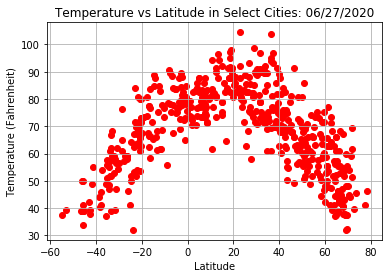

In [49]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp (F)"], marker="o", color="red")

date_of_analysis = pd.Timestamp("today").strftime("%m/%d/%Y")
date_of_analysis
# Incorporate the other graph properties
plt.title("Temperature vs Latitude in Select Cities:"+ " " + date_of_analysis)
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

 #Save the figure
plt.savefig("Temperature vs Latitude in Select Cities: .png")

# Show plot
plt.show()

The code is analyzing the relationship between cities latitude and their max temperature.
The plot is suggesting that there is a strong correlation between latitude and max temperature. The closer cities are to the equators the higher temperature and drops as they approach the poles.

## Latitude vs. Humidity Plot

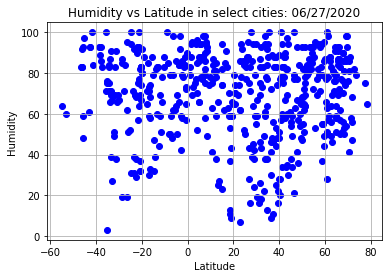

In [80]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity (%)"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Humidity vs Latitude in select cities:" + " " + date_of_analysis)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity vs Latitude in select cities.png")

# Show plot
plt.show()

The code is analyzing the relationship between cities latitude and their humidity.
The plot is suggesting that there is no correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

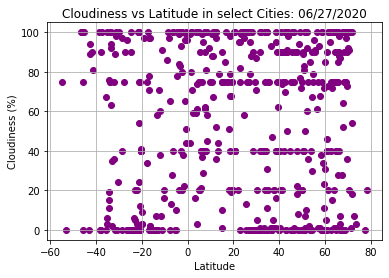

In [81]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness (%)"], marker="o", color="purple")

# Incorporate the other graph properties
plt.title("Cloudiness vs Latitude in select Cities:" + " " + date_of_analysis)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness vs Latitude in select Cities.png")

# Show plot
plt.show()

The code is analyzing the relationship between cities latitude and their cloudiness. 
The plot is suggesting that there is little to no correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

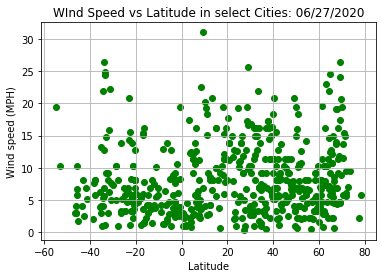

In [82]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed (MPH)"], marker="o", color="green")

# Incorporate the other graph properties
plt.title("WInd Speed vs Latitude in select Cities:" + " " + date_of_analysis)
plt.ylabel("Wind speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WInd Speed vs Latitude in select Cities.png")

# Show plot
plt.show()

The code is analyzing the relationship between cities latitude and their wind speed. The plot is suggesting that the closer cities are to the north pole the more cities with higher wind speed.

## Linear Regression

In [53]:
# OPTIONAL: Create a function to create Linear Regression plots

In [54]:
# Create Northern and Southern Hemisphere DataFrames

Northern_Hemisphere = weather_data.loc[weather_data["Lat"] > 0]
Southern_Hemisphere = weather_data.loc[weather_data["Lat"] < 0]

Northern_Hemisphere

,City,Lat,Lon,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
2,Tiznit Province,29.58,-9.50,71.40,59,0,3.49,MA,1593286215
5,Talnakh,69.49,88.40,55.40,87,36,8.95,RU,1593286215
6,Lavrentiya,65.58,-171.00,39.00,84,100,10.69,RU,1593285656
8,Bongouanou,6.65,-4.20,73.54,98,95,3.87,CI,1593286215
10,Broome,42.25,-75.83,75.00,78,40,11.41,US,1593286216
...,...,...,...,...,...,...,...,...,...
520,Ilulissat,69.22,-51.10,37.40,86,75,4.70,GL,1593286045
521,Lakselv,70.05,24.97,48.20,76,92,19.46,NO,1593286287
522,Stephenville,32.22,-98.20,90.00,43,40,14.99,US,1593286287
523,Sault Ste. Marie,46.52,-84.33,66.20,77,75,9.17,CA,1593286287


In [55]:
Southern_Hemisphere

,City,Lat,Lon,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,São Félix do Xingu,-6.64,-51.99,88.27,48,28,4.16,BR,1593285655
1,Airai,-8.93,125.41,55.80,100,86,3.15,TL,1593285629
3,Cape Town,-33.93,18.42,61.00,71,75,6.93,ZA,1593285481
4,Hithadhoo,-0.60,73.08,84.83,73,44,8.19,MV,1593285642
7,Mount Isa,-20.73,139.50,53.60,37,0,5.82,AU,1593285627
...,...,...,...,...,...,...,...,...,...
511,Puerto Nariño,-3.77,-70.38,87.80,66,20,5.82,CO,1593286285
515,Mkushi,-13.62,29.39,61.41,60,58,3.94,ZM,1593286285
517,Diamantino,-14.41,-56.45,87.51,39,0,4.14,BR,1593286087
524,Curup,-3.47,102.53,68.94,92,100,3.18,ID,1593286287


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5507594687730215


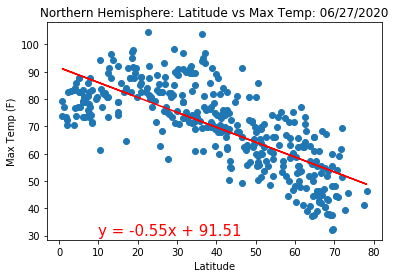

In [56]:
# Build a scatter plot for each data type
#plt.scatter(Northern_Hemisphere["Lat"], Northern_Hemisphere["Max Temp (F)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude vs Max Temp:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Hemisphere: Latitude vs Max Temp.png")
plt.show()


Observation: 
It can be observed that the closer one gets to the equator the maximum temperature is higher. The r-squared value indicates 
that there is a correlation between latitude and maximum temperature in the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6621680242434143


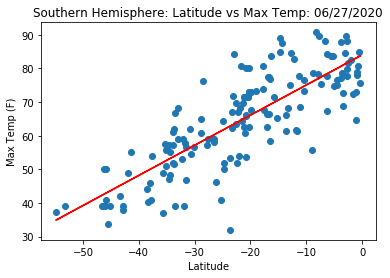

In [79]:
# Build a scatter plot for each data type
#plt.scatter(Southern_Hemisphere["Lat"], Southern_Hemisphere[" Max Temp (F)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,20),fontsize=1,color="green")
plt.title("Southern Hemisphere: Latitude vs Max Temp:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern Hemisphere: Latitude vs Max Temp.png")
plt.show()


Observation: 
It can be observed that the closer one gets to the equator the maximum temperature is higher. The r-squared value indicates 
that there is a correlation between latitude and maximum temperature in the Southern Hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003374038999392201


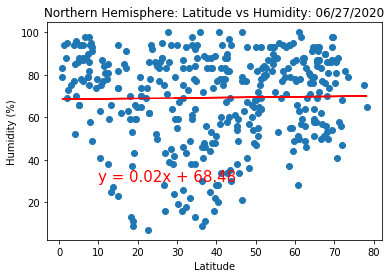

In [58]:
# Build a scatter plot for each data type
#plt.scatter(Northern_Hemisphere["Lat"], Northern_Hemisphere["Humidity (%)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude vs Humidity:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Hemisphere: Latitude vs Humidity.png")
plt.show()

Observation: 
It can be observed that the humidity not impacted by latitude. The r-squared value indicates that there 
appears to be no correlation between latitude and humidity in the Northern Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00202421548680637


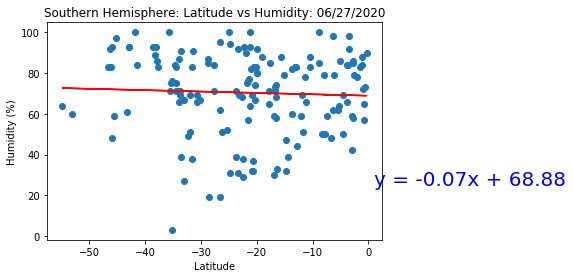

In [59]:
# Build a scatter plot for each data type
#plt.scatter(Southern_Hemisphere["Lat"], Southern_Hemisphere["Humidity (%)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,25),fontsize=20,color="blue")
plt.title("Southern Hemisphere: Latitude vs Humidity:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern Hemisphere: Latitude vs Humidity.png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator the humidity is higher. The r-squared value indicates that there 
appears to be very little correlation between latitude and humidity in the Southern Hemisphere. This could also be because ther are no cities below -50 latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<Figure size 432x288 with 0 Axes>

The r-squared is: 0.005963496689547125


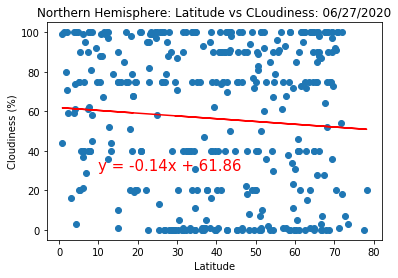

In [60]:
# Build a scatter plot for each data type
#plt.scatter(Northern_Hemisphere["Lat"], Northern_Hemisphere["Cloudiness (%)"], marker="o")


# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude vs CLoudiness:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Hemisphere: Latitude vs Cloudiness.png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator you could find more clouds. The r-squared value indicates that there 
appears to be very little correlation between latitude and cloudiness in the Northen Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00207903937817934


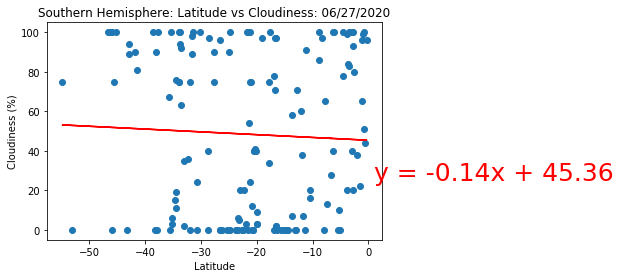

In [61]:
# Build a scatter plot for each data type
#plt.scatter(Southern_Hemisphere["Lat"], Southern_Hemisphere["Cloudiness (%)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,25),fontsize=25,color="red")
plt.title("Southern Hemisphere: Latitude vs Cloudiness:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern Hemisphere: Latitude vs Cloudiness.png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator you could find more clouds. The r-squared value indicates that there 
appears to be very little correlation between latitude and cloudiness in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0002784445052334432


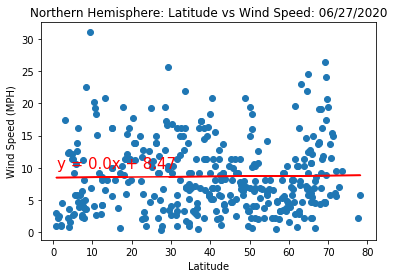

In [62]:
# Build a scatter plot for each data type
#plt.scatter(Northern_Hemisphere["Lat"], Northern_Hemisphere["Wind Speed (MPH)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed (MPH)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude vs Wind Speed:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Hemisphere: Latitude vs Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.027200188741323537


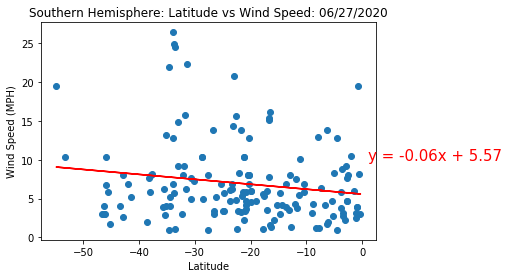

In [63]:
# Build a scatter plot for each data type
#plt.scatter(Southern_Hemisphere["Lat"], Southern_Hemisphere["Wind Speed (MPH)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Wind Speed (MPH)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.title("Southern Hemisphere: Latitude vs Wind Speed:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern Hemisphere: Latitude vs Wind Speed.png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator you could find higher wind speeds. The r-squared value indicates that it appears to be no correlation between latitude and wind speed in the Southern Hemisphere.